<a href="https://colab.research.google.com/github/skagnihotri/house_price-AITS/blob/master/House_price_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [147]:
# reading dataset
dataset = pd.read_csv('/content/train.csv')
dataset.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# ***Data Preprocessing***

In [148]:
dataset.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
                 ... 
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
Fireplaces          0
FireplaceQu       690
GarageType         81
GarageYrBlt        81
GarageFinish       81
GarageCars          0
GarageArea          0
GarageQual         81
GarageCond         81
PavedDrive

In [0]:
categorical_col = ['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
                      'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 
                       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 
                       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
                       'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition']

drop_col = ['Alley', 'PoolQC', 'Fence', 'MiscFeature', 'FireplaceQu', 'MoSold', 'YrSold', 'YearBuilt', 'YearRemodAdd', 
            'Id', 'SalePrice', 'GarageYrBlt']

drop_final = drop_col + categorical_col

In [0]:
#modifing features
dataset['AGE'] = 2019 - dataset['YearRemodAdd']
dataset['AGE_garage'] = 2019 - dataset['GarageYrBlt']

In [151]:
#filling and droping nan
dataset['MasVnrType'] = dataset['MasVnrType'].fillna(value = "None")
dataset['BsmtExposure'] = dataset['BsmtExposure'].fillna(value = "NA")
dataset['BsmtFinType2'] = dataset['BsmtFinType2'].fillna(value = "NA")
dataset['Electrical'] = dataset['Electrical'].fillna(value = "SBrkr")
dataset['LotFrontage'] = dataset['LotFrontage'].fillna(value = dataset['LotFrontage'].mean())
dataset['MasVnrArea'] = dataset['MasVnrArea'].fillna(value = dataset['MasVnrArea'].mean())

dataset.dropna(subset = ['BsmtQual'], inplace= True)
dataset.dropna(subset = ['GarageType'], inplace= True)
dataset.shape

(1349, 83)

In [152]:
#seperating categorical features
df_cat = dataset[categorical_col].copy()
df = dataset.copy()
y = dataset.SalePrice
df.drop(drop_final, inplace = True, axis = 1)
df = df.reset_index(drop=True)
df.shape

(1349, 31)

In [153]:
# one hot encoding
from sklearn.preprocessing import OneHotEncoder
onehot = OneHotEncoder(drop = 'first')
X_onehot = onehot.fit_transform(df_cat).toarray()
X_onehot = pd.DataFrame(X_onehot)
X_onehot.shape

(1349, 208)

In [154]:
# final features
X = pd.concat([df, X_onehot], axis = 1)
X = X.values
X.shape

(1349, 239)

In [0]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler_X = StandardScaler()
X = scaler_X.fit_transform(X)

In [156]:
# spliting the dataset
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2)
X_train.shape

(1079, 239)

# ***3 Layer Neural Network***

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
import keras.backend as k

In [0]:
def score(y_true, y_pred):
    mean_true = k.mean(y_true)
    u = k.sum(k.square(y_pred - y_true))
    v = k.sum(k.square(y_true - mean_true))
    return (1 - u/v)

In [0]:
model = Sequential()

In [0]:
model.add(Dense(units= 2048, activation= 'relu', input_shape= (239, )))
model.add(Dropout(rate = 0.5))
model.add(Dense(units= 2048, activation= 'relu'))
model.add(Dropout(rate = 0.5))
model.add(Dense(units= 2048, activation= 'relu'))
model.add(Dropout(rate = 0.5))


# Output Layer
model.add(Dense(units= 1, activation= 'linear'))

In [0]:
model.compile(optimizer= keras.optimizers.RMSprop(), 
              loss= 'mean_squared_error', 
              metrics= [score])

In [347]:
history = model.fit(X_train, y_train, 
                    batch_size= 32, 
                    epochs= 150, 
                    validation_data = (X_test, y_test))

Train on 1079 samples, validate on 270 samples
Epoch 1/150
1079/1079 [==============================] - 5s 5ms/step - loss: 19368734730.9138 - score: -2.6076 - val_loss: 5690482255.6444 - val_score: -0.0029
Epoch 2/150
1079/1079 [==============================] - 1s 509us/step - loss: 3384180179.2771 - score: 0.3657 - val_loss: 3756101461.3333 - val_score: 0.3585
Epoch 3/150
1079/1079 [==============================] - 1s 475us/step - loss: 2182914475.4180 - score: 0.5996 - val_loss: 3311269065.0074 - val_score: 0.4445
Epoch 4/150
1079/1079 [==============================] - 1s 483us/step - loss: 1802937228.9305 - score: 0.6438 - val_loss: 2771554087.8222 - val_score: 0.5220
Epoch 5/150
1079/1079 [==============================] - 1s 479us/step - loss: 1386870321.9722 - score: 0.7246 - val_loss: 2655075790.6963 - val_score: 0.5582
Epoch 6/150
1079/1079 [==============================] - 1s 481us/step - loss: 1056742788.5079 - score: 0.8218 - val_loss: 2284622984.5333 - val_score: 0.617

In [348]:
model.evaluate(X_test, y_test), model.evaluate(X_train, y_train)

1079/1079 [==============================] - 0s 120us/step


([1388575417.837037, 0.8082479980256823],
 [55744468.28544949, 0.9883254322881937])

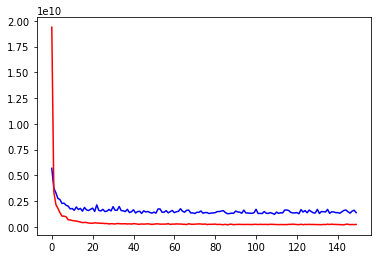

In [350]:
iterations = range(150)
plt.plot(iterations, history.history['val_loss'], c='b')
plt.plot(iterations, history.history['loss'], c='r')

[0, 151, 0.5, 1]

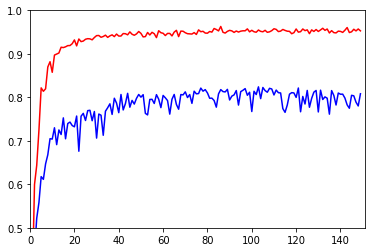

In [352]:
plt.plot(iterations, history.history['val_score'], c='b')
plt.plot(iterations, history.history['score'], c='r')
plt.axis([0, 151, 0.5, 1])